# UDACITY DATA ANALYST NANODEGREE

## P1- TEST A PERCEPTUAL PHENOMENON

**Author-[ANISH KUMAR](https://github.com/Anish-kr)  
Date    - April 25, 2017 **


## Background Information

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example <span style="color:blue">BLUE</span>,<span style="color:red">RED</span>. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example <span style="color:green">PURPLE</span>,<span style="color:blue">ORANGE</span>. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

## Questions For Investigation

1.. What is our independent variable? What is our dependent variable?

* Independent variable: the words and their color(congruent words or incongruent words)

* Dependent variable: Time taken to name the ink colors in equally-sized lists

2..  What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.



+ The null hypothesis in this case should be that the mean time taken to name the ink colors in the congruent condition  should be greater than equal to the mean time taken to name the ink colors in the incongruent condition. 
+ And the alternative hypothesis for this task is that the mean time taken to name the ink colors in congruent condition should be less than the mean time taken to name the ink colors in incongruent condition.
+ From the above itself, we can say that we need to perform one-tailed test where we are interested only in the fact that time taken to read the ink color in congruent condition is less or not. We are not interested in the fact that time taken to read the ink color in congruent condition is more than in the case of incongruent condition because not only it is intuitive but and also clearly stated [here](https://en.wikipedia.org/wiki/Stroop_effect)

Therefore if we assume-

+ <body>&#181;</body><sub>C</sub> to be mean time taken to name the ink colors in the congruent condition
+ <body>&#181;</body><sub>I </sub> to be mean time taken to name the ink colors in the incongruent condition
+ H<sub>0</sub> to denote the NULL Hypothesis
+ H<sub>A</sub> to denote the Alternative Hypothesis
&#8805;
Then- 

+ H<sub>0</sub> : <body>&#181;</body><sub>C</sub> <body>&#8805;</body> <body>&#181;</body><sub>I </sub>
+ H<sub>A</sub> : <body>&#181;</body><sub>C</sub> < <body>&#181;</body><sub>I </sub>

Now we Since the sample is small( size(n) < 30 ) and the population parameters are not known, We would go for the ** t-test. **And since from what we have already discussed before, We can say that we are going for ** One-tailed t-test**

##### The assumptions for the t-test for dependent samples are the following-
 * Your dependent variable should be measured on a continuous scale (i.e., it is measured at the interval or ratio level). Examples of variables that meet this criterion include revision time (measured in hours), intelligence (measured using IQ score), exam performance (measured from 0 to 100), weight (measured in kg), and so forth.
 
 * Your independent variable should consist of two categorical, "related groups" or "matched pairs". "Related groups" indicates that the same subjects are present in both groups. The reason that it is possible to have the same subjects in each group is because each subject has been measured on two occasions on the same dependent variable. 
 
 * There should be no significant outliers in the differences between the two related groups. Outliers are simply single data points within your data that do not follow the usual pattern.he problem with outliers is that they can have a negative effect on the dependent t-test, reducing the validity of your results. In addition, they can affect the statistical significance of the test.
 
 * The distribution of the differences in the dependent variable between the two related groups should be approximately normally distributed. We talk about the dependent t-test only requiring approximately normal data because it is quite "robust" to violations of normality, meaning that the assumption can be a little violated and still provide valid results.

The t-test should be of the dependent samples variety because the same subject is exposed to two conditions and tested for each, which are the defining criteria for "within-subjects" or "repeated-measures" statistical tests.[Read More](https://statistics.laerd.com/statistical-guides/dependent-t-test-statistical-guide.php)

Now to carry out the test we are provided with a dataset "stroopdata.csv".

In [2]:
import seaborn as sns#improves the look of the graphs
%pylab inline        
#prevents graph from flowing out of the active window

import matplotlib.pyplot as plt
import numpy as np   #for handling arrays
import pandas as pd  #for handling dataframes

Populating the interactive namespace from numpy and matplotlib


In [92]:
## Reading the data in a suitable variable
data = pd.read_csv("stroopdata.csv")
data.head() # displaying the dataset

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [91]:
## Since we are very much interested in the difference of the two scores we'll create another column denoting the same.
diff=data
diff['Difference'] = data['Congruent']-data['Incongruent'] ##Using vectorized operations on dataframe

diff


,Congruent,Incongruent,Difference
0,12.079,19.278,-7.199
1,16.791,18.741,-1.950
2,9.564,21.214,-11.650
3,8.630,15.687,-7.057
4,14.669,22.803,-8.134
5,12.238,20.878,-8.640
6,14.692,24.572,-9.880
7,8.987,17.394,-8.407
8,9.401,20.762,-11.361
9,14.480,26.282,-11.802


3.. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

In [93]:
#displaying the descriptive statistics measures
diff.describe()

,Congruent,Incongruent,Difference
count,24.000000,24.000000,24.000000
mean,14.051125,22.015917,-7.964792
std,3.559358,4.797057,4.864827
min,8.630000,15.687000,-21.919000
25%,11.895250,18.716750,-10.258500
50%,14.356500,21.017500,-7.666500
75%,16.200750,24.051500,-3.645500
max,22.328000,35.255000,-1.950000


**Table 1.1**

4.. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

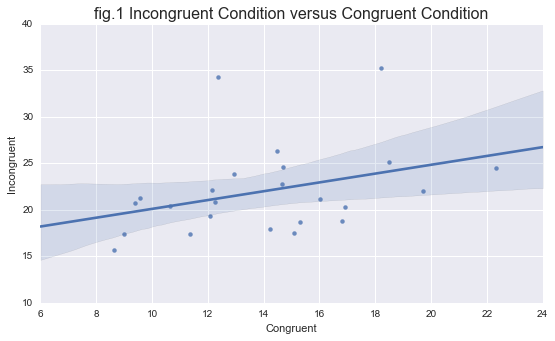

In [118]:
viz=sns.regplot(x='Congruent',y='Incongruent',scatter=True,data=diff);
viz.set_title('fig.1 Incongruent Condition versus Congruent Condition', fontsize=16);

From the above graph we notice that as the time for reading the ink-name for Incongruent condition increases, the time for congruent condition also increases. It is true in general sense as reading ability, and sharpness of mind depends on an individual. And that is why if one time increases for an individual so does the other.

Also we can notice two outliers, two individuals who take much larger time to perform in incongruent condition as compared to that in congruent condition.

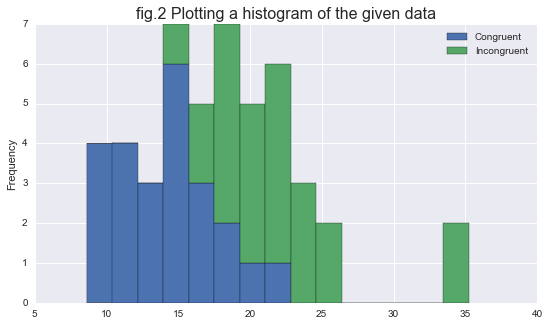

In [117]:
##Now Let us plot a histogram
viz2=data.plot(kind='hist',stacked=True,bins=15);
viz2.set_title("fig.2 Plotting a histogram of the given data", fontsize=16);

Above obtained is a histogram plotting of the given data. 

As we notice from the blue bars that represent the congruent condition, we find that that range of time taken in case of congruent condition is somewhere between 8 and 23. Mean time being at 14.05 units and mode being at 15.

While green bars that represent the incongruent tells us that time in this case vary from 15 to 35 units. Its is bidal data whith modes being somewhere at 18 and 23 units. 
Also there lies an outlier for this case at t equal 35.

5.. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

In [131]:
array1=np.zeros((data.Congruent.count(),), dtype=np.int)


In [130]:
from scipy.stats import ttest_ind
##Performing the test using pandas itself


ttest_ind(diff['Difference'],array1)

Ttest_indResult(statistic=-8.020706944109957, pvalue=2.7567900105798279e-10)

In [124]:
##confidence interval for population mean of congruent data
import numpy as np, scipy.stats as st

st.t.interval(0.99, len(data['Congruent'])-1, loc=np.mean(data['Congruent']), scale=st.sem(data['Congruent']))

(12.011452730450978, 16.090797269549029)

In [123]:
# confidence interval for range of difference in time takes for the two cases
import numpy as np, scipy.stats as st

st.t.interval(0.99, len(diff['Difference'])-1, loc=np.mean(diff['Difference']), scale=st.sem(diff['Difference']))

(-10.75255638808285, -5.1770269452504838)

+ Taking significance level($\alpha$) equal to 0.01 that corresponds to 99% significance level   
+ Degree of freedom(df)               equal to 23   
+ Therefore t<sub>crit</sub> from t-table equals -2.50   
+ Also mean time in congruent condition for the entire population will lie in range of 12.011 and 16.090

**Obtained value of t is =-8.0207   
And p-value for corresponding statistic is << 0.01**

**Hence we can satisfactorily reject the Null **

### Hence we can say that mean time taken to name the ink colors in congruent condition is less than the mean time taken to name the ink colors in incongruent condition.
(There is sufficient evidence at the α = .01 level of significance to support the claim)

6.. Optional: What do you think is responsible for the effects observed?   
Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

My hypothesis for the above results are that these are due to difference in the ability of the brain to recognize color of the word as compared to reading it. From the birth itself we spend a huge time reading texts. The action becomes so spontaneous that as soon a word appears, involuntarily end up reading it. Whereas the time devoted to recognizing color of the texts negligible when compared to previous case. So extra attention needs to be devoted to carry out the same. As a result a lag in time occurs.

Numerical/Physical size Stroop tasks, where numerical values and physical size are the factors that contribute to congruency/incongruency, results in a similar effect. It takes longer to recognize the number and physical size (two separate tasks) of small numbers that have a large physical size and large numbers that have a small physical size.[Read More..](https://en.wikipedia.org/wiki/Numerical_Stroop_effect)



## References

1. [Wikipedia: Numerical Stroop effect](https://en.wikipedia.org/wiki/Numerical_Stroop_effect)
2. [Wikipedia: More on StroopEffect](https://en.wikipedia.org/wiki/Stroop_effect)
3. [Applying color in Markdown](http://stackoverflow.com/questions/35465557/how-to-apply-color-in-markdown)
4. [Markdown help](http://www.rob-mcculloch.org/2017_bayes/webpage/R/rmarkdown1.pdf)
5. [More on dependent variables](https://statistics.laerd.com/spss-tutorials/dependent-t-test-using-spss-statistics.php)
6. [Drawing special symbols](https://math.meta.stackexchange.com/questions/21841/how-to-type-greater-than-or-equal-to-symbols)
7. [Drawing scatter plot using seaborn](http://seaborn.pydata.org/generated/seaborn.regplot.html)
8. [Drawing stacked bar chart](http://stackoverflow.com/questions/22226375/histogram-with-stacked-components)
9. [Carrying out t-test using pandas](http://stackoverflow.com/questions/13404468/t-test-in-pandas-python)
